<a href="https://colab.research.google.com/github/DommiiUdomp/-/blob/main/EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Early Stopping

In [106]:
#Load the data set
import tensorflow as tf
from sklearn.datasets import load_diabetes

data_diabets = load_diabetes()

#save input and target variables
data = data_diabets['data']
target = data_diabets['target']

#nomalize the target
target_normalize = (target - target.mean(axis = 0)) / target.std()

#slite train and test data
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target_normalize, test_size = 0.1)

print (train_data.shape , test_data.shape , train_target.shape , test_target.shape)

(397, 10) (45, 10) (397,) (45,)


In [138]:
#Build the unregularized model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model() :
  unreg_model = Sequential ( [Dense (128, activation = 'relu' , input_shape = (train_data.shape[1], )),
                              Dense (128, activation = 'relu') ,
                              Dense (128, activation = 'relu') ,
                              Dense (128, activation = 'relu') ,
                              Dense (128, activation = 'relu') ,
                              Dense (128, activation = 'relu') ,
                              Dense (1) ,
  ])
  return unreg_model

unreg_model = get_model()

In [108]:
#EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

#Compile
unreg_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
unreg_his = unreg_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=10)] )
#evaluate
unreg_model.evaluate(test_data,test_target, verbose=2)

2/2 - 0s - loss: 0.3957 - mae: 0.4911


[0.3957177400588989, 0.49110954999923706]

In [137]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
#Regularized Model

def get_regularization_model(wight_d,rate) :
  regularization_model = Sequential ( [
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d), input_shape = (train_data.shape[1], )),
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (128, activation = 'relu' , kernel_regularizer = regularizers.l2(wight_d)) ,
                                       Dropout (rate),
                                       Dense (1) ,
  ])
  return regularization_model

In [115]:
regularization_model  = get_regularization_model(1e-8,0.2) 

#compile
regularization_model.compile (optimizer= 'adam', loss = 'mse' , metrics= ['mae'] )
#train
reg_history = regularization_model.fit(train_data,train_target, epochs=100, 
                                       batch_size=128, validation_split=0.15, verbose=False,
                                       callbacks = [EarlyStopping(patience=10)])
#evaluate
regularization_model.evaluate(test_data,test_target, verbose=2)


2/2 - 0s - loss: 0.3677 - mae: 0.4891


[0.36768943071365356, 0.48910534381866455]

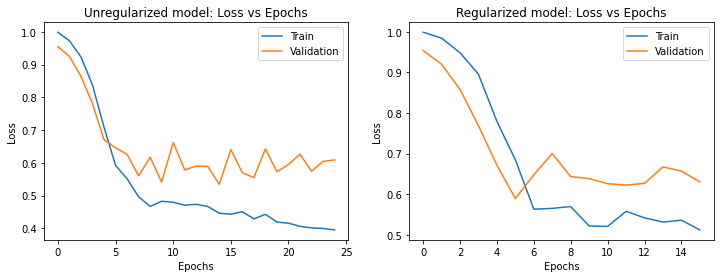

In [116]:
#plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,4))

# Unregularized model plot

ax = fig.add_subplot(121)
ax.plot(unreg_his.history['loss'], label="Train")
ax.plot(unreg_his.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Unregularized model: Loss vs Epochs")
ax.legend()

# Regularized model plot

ax = fig.add_subplot(122)
ax.plot(reg_history.history['loss'], label="Train")
ax.plot(reg_history.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Regularized model: Loss vs Epochs")
ax.legend()

**Let's try again**

In [131]:
#Unregularized model

#Compile
unreg_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
unreg_his = unreg_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=5)] )
#evaluate
unreg_model.evaluate(test_data,test_target, verbose=2)

2/2 - 0s - loss: 0.4086 - mae: 0.4919


[0.4085901081562042, 0.4919254183769226]

In [132]:
#Regularized model

#Compile
regularization_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
reg_history = regularization_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=5)] )
#evaluate
regularization_model.evaluate(test_data,test_target, verbose=2)

2/2 - 0s - loss: 0.3871 - mae: 0.4774


[0.38712674379348755, 0.4774198830127716]

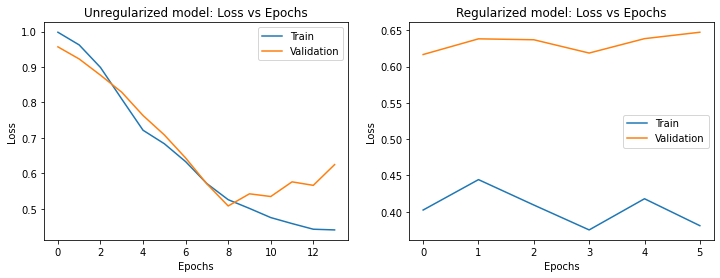

In [133]:
fig = plt.figure(figsize=(12,4))

# Unregularized model plot

ax = fig.add_subplot(121)
ax.plot(unreg_his.history['loss'], label="Train")
ax.plot(unreg_his.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Unregularized model: Loss vs Epochs")
ax.legend()

# Regularized model plot

ax = fig.add_subplot(122)
ax.plot(reg_history.history['loss'], label="Train")
ax.plot(reg_history.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Regularized model: Loss vs Epochs")
ax.legend()

**Let's try Again**

2/2 - 0s - loss: 0.3984 - mae: 0.4832
2/2 - 0s - loss: 0.3532 - mae: 0.4644


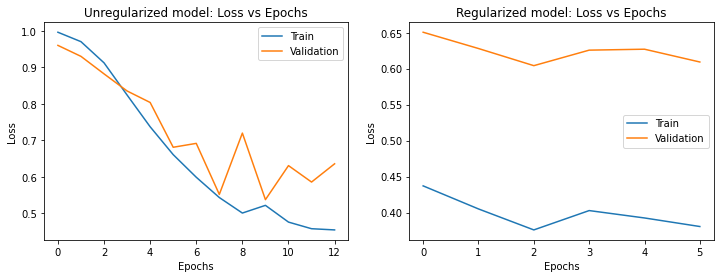

In [136]:
#Unregularized model

#Compile
unreg_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
unreg_his = unreg_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=5, min_delta=0.1)] )
#evaluate
unreg_model.evaluate(test_data,test_target, verbose=2)

#Regularized model

#Compile
regularization_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
reg_history = regularization_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=5, min_delta=0.1)] )
#evaluate
regularization_model.evaluate(test_data,test_target, verbose=2)

fig = plt.figure(figsize=(12,4))

# Unregularized model plot

ax = fig.add_subplot(121)
ax.plot(unreg_his.history['loss'], label="Train")
ax.plot(unreg_his.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Unregularized model: Loss vs Epochs")
ax.legend()

# Regularized model plot

ax = fig.add_subplot(122)
ax.plot(reg_history.history['loss'], label="Train")
ax.plot(reg_history.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Regularized model: Loss vs Epochs")
ax.legend()

**AGAIN!!**

2/2 - 0s - loss: 0.4315 - mae: 0.5397
2/2 - 0s - loss: 0.3472 - mae: 0.4647


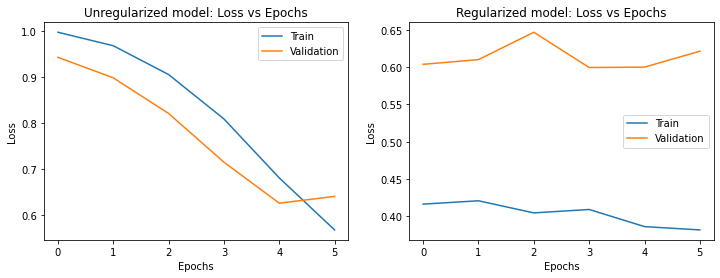

In [139]:
#Unregularized model

#Compile
unreg_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
unreg_his = unreg_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=5, min_delta=0.1, mode = 'max')] )
#evaluate
unreg_model.evaluate(test_data,test_target, verbose=2)

#Regularized model

#Compile
regularization_model.compile ( optimizer= 'adam' , loss = 'mse',  metrics= ['mae'])
#train
reg_history = regularization_model.fit(train_data, train_target, epochs=100, batch_size=128, 
                            validation_split=0.15, verbose=False, 
                            callbacks = [EarlyStopping(patience=5, min_delta=0.1, mode='max')] )
#evaluate
regularization_model.evaluate(test_data,test_target, verbose=2)

fig = plt.figure(figsize=(12,4))

# Unregularized model plot

ax = fig.add_subplot(121)
ax.plot(unreg_his.history['loss'], label="Train")
ax.plot(unreg_his.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Unregularized model: Loss vs Epochs")
ax.legend()

# Regularized model plot

ax = fig.add_subplot(122)
ax.plot(reg_history.history['loss'], label="Train")
ax.plot(reg_history.history['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Regularized model: Loss vs Epochs")
ax.legend()